# Lesson 4: Coding with o1

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>

</div>

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Different Run Results:</b> The output generated by AI models can vary with each execution due to their dynamic, probabilistic nature. Don't be surprised if your results differ from those shown in the video.</p>

In [1]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

# Import OpenAI key
from helper import get_openai_api_key
openai_api_key = get_openai_api_key()

In [2]:
from IPython.display import display, Image, Markdown
from openai import OpenAI

client = OpenAI(api_key=openai_api_key)
GPT_MODEL = 'gpt-4o-mini'
O1_MODEL = 'o1-mini'

## Create



In [3]:
def get_chat_completion(model, prompt):
    """
    Calls the OpenAI API to get a chat completion.

    :param model: The model to use for the completion.
    :param prompt: The prompt to send to the model.
    :return: The completion response from the model.
    """
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
    )
    return response.choices[0].message.content

In [4]:
react_demo_prompt = """Create an elegant, delightful React component for an Interview Feedback Form where:

1. The interviewer rates candidates across multiple dimensions using rubrics
2. Each rating must include specific evidence/examples
3. The final recommendation should auto-calculate based on a weighted scoring system
4. The UI should guide interviewers to give specific, behavioral feedback

The goal is to enforce structured, objective feedback gathering. A smart model should:
- Create a thoughtful rubric structure
- Add helpful prompts/placeholders
- Build in intelligent validation

Make sure to
 - Call the element FeedbackForm
 - Start the code with "use client"

Respond with the code only! Nothing else!"""

In [5]:
gpt_code = get_chat_completion(GPT_MODEL, react_demo_prompt)

In [6]:
print(gpt_code)

```javascript
"use client";

import React, { useState } from 'react';

const rubrics = [
  { id: 'communication', label: 'Communication Skills', weight: 0.4, max: 5 },
  { id: 'technical', label: 'Technical Knowledge', weight: 0.3, max: 5 },
  { id: 'teamwork', label: 'Teamwork Ability', weight: 0.2, max: 5 },
  { id: 'problemSolving', label: 'Problem-Solving Skills', weight: 0.1, max: 5 }
];

const FeedbackForm = () => {
  const [ratings, setRatings] = useState({});
  const [evidences, setEvidences] = useState({});
  const [recommendation, setRecommendation] = useState("");

  const handleRatingChange = (id, value) => {
    setRatings({ ...ratings, [id]: value });
    calculateRecommendation();
  };

  const handleEvidenceChange = (id, value) => {
    setEvidences({ ...evidences, [id]: value });
  };

  const calculateRecommendation = () => {
    let totalScore = 0;
    rubrics.forEach(rubric => {
      const rating = ratings[rubric.id] || 0;
      totalScore += rating * rubric.weight

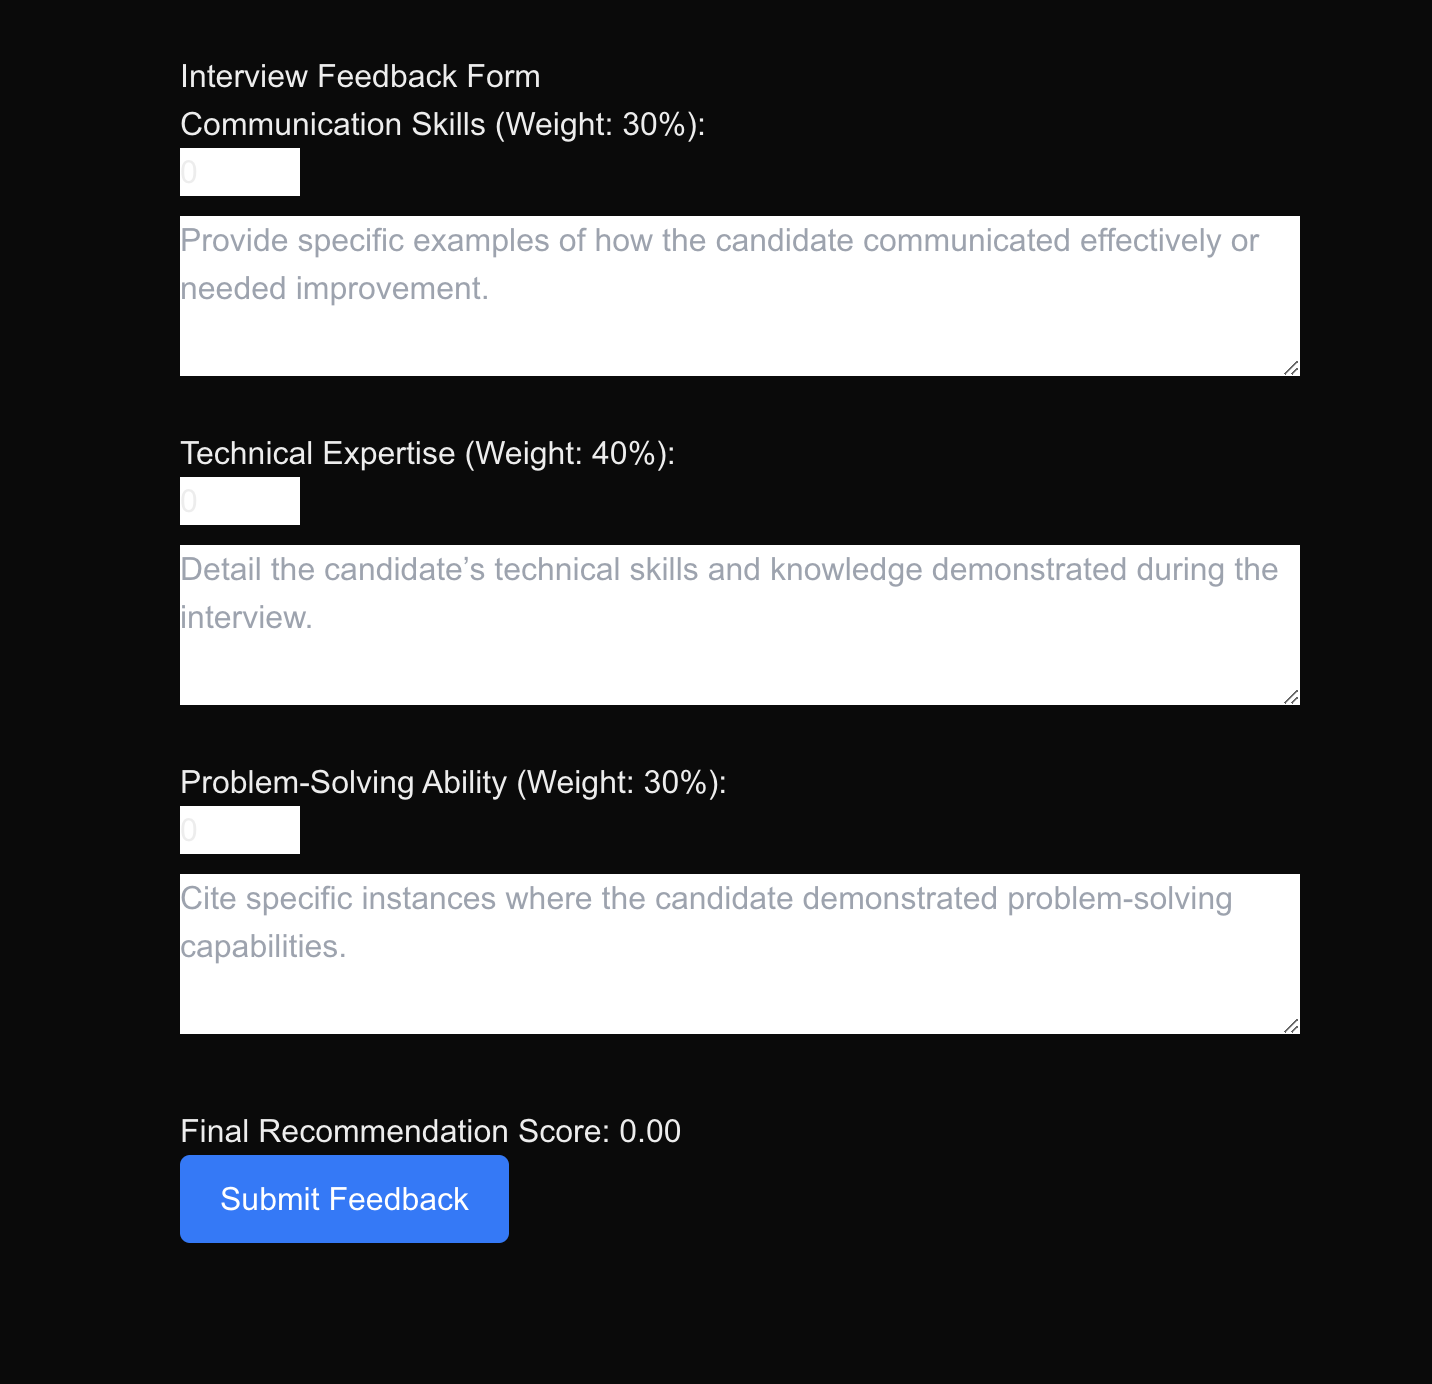

In [7]:
display(Image('gpt4_app_image.png'))

In [8]:
o1_code = get_chat_completion(O1_MODEL, react_demo_prompt)

BadRequestError: Error code: 400 - {'error': {'message': 'Invalid prompt: your prompt was flagged as potentially violating our usage policy. Please try again with a different prompt: https://platform.openai.com/docs/guides/reasoning/advice-on-prompting', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_prompt'}}

In [ ]:
print(o1_code)

In [ ]:
display(Image('o1_app_image.png'))

### Render the generated code yourself!
There are two ways to try rendering this code yourself. The first is the easiest &#x1F642;  
> Go to this [link](https://onecompiler.com/react), cut the code from the notebook and paste it into the editor.
 
 The 2nd is more complex:
> Download a zip file that contains a react app and follow the instructions in the README. This file can be found by 1) Click on the "File" option on the top menu of the notebook and then 2) click on "Open". This will bring up a file view. 3) Click on the box next to the file "app.zip" 4) Click "Download". 



## Edit

The included code has some clear issues, such as multiple nested loops and a lack of error handling, and also is not very readable. Let's feed the code to both models, and see how they clean it up.

In [ ]:
# Pre-generated code snippet with issues that need to be resolved.
code_snippet = """
def process_orders(orders_list, settings={}, debug=False, notify_customer=True):
    results = []
    errors = []
    notifications = []
    # Process all orders
    for i in range(0, len(orders_list)):
        # Get order
        order = orders_list[i]
        try:
            # Validate order has required fields
            if 'id' in order and 'items' in order and 'customer' in order:
                # Check customer info
                if 'email' in order['customer'] and 'name' in order['customer']:
                    # Validate items
                    items_valid = True
                    total = 0
                    # Check each item
                    for item in order['items']:
                        if not ('product_id' in item and 'quantity' in item):
                            items_valid = False
                            errors.append(f"Invalid item in order {order['id']}")
                            if debug == True:
                                print(f"Debug: Invalid item found in order {order['id']}")
                        else:
                            # Calculate total
                            if 'price' in item:
                                total = total + (item['quantity'] * item['price'])
                            else:
                                items_valid = False
                                errors.append(f"Missing price in order {order['id']}")
                    # Process if items valid
                    if items_valid == True:
                        # Apply any discounts from settings
                        if settings != {} and 'discount' in settings:
                            total = total * (1 - settings['discount'])
                        # Create processed order
                        processed = {
                            'order_id': order['id'],
                            'customer_name': order['customer']['name'],
                            'customer_email': order['customer']['email'],
                            'total': total,
                            'items_count': len(order['items'])
                        }
                        results.append(processed)
                        # Send notification
                        if notify_customer == True:
                            try:
                                # Create notification
                                notification = {
                                    'to': order['customer']['email'],
                                    'subject': 'Order Processed',
                                    'total': total
                                }
                                notifications.append(notification)
                                if debug == True:
                                    print(f"Debug: Notification queued for order {order['id']}")
                            except Exception as e:
                                errors.append(f"Notification failed for order {order['id']}")
                else:
                    errors.append(f"Invalid customer data in order {order['id']}")
            else:
                errors.append(f"Missing required fields in order {order['id']}")
        except Exception as e:
            # Add general error
            errors.append(f"Error processing order {order['id']}: {str(e)}")
            if debug == True:
                print(f"Debug: Error processing order {order['id']}: {str(e)}")

    # Print debug summary
    if debug == True:
        print(f"Debug: Processed {len(results)} orders with {len(errors)} errors")
        print(f"Debug: Queued {len(notifications)} notifications")

    return {
        "processed_orders": results,
        "errors": errors,
        "notifications": notifications
    }
"""

In [ ]:
prompt = f"""I have some code that I'd like you to clean up and improve. Return only the updated code that fixes the issues: {code_snippet}"""
gpt_code = get_chat_completion(GPT_MODEL, prompt)
print(gpt_code)

In [ ]:
o1_code = get_chat_completion(O1_MODEL, prompt)
print(o1_code)

In [ ]:
result = get_chat_completion(O1_MODEL,f"which code is better and why? Option 1: {gpt_code}... or Option 2: {o1_code}")
display(Markdown(result))